In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz

In [2]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "Alt-right"
#For now, just include all json files
pattern = os.path.join(ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
    
#print data
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html


In [3]:
#Reading data through

#Message data
messageData = []


#UID associated with name
"""
      "UID": {
        "name": Name
      },
"""
userList = []

#List of UIDs. Index if mentioned in 'u' in messages
"""
Ex:
      "384741477567430657": {
        "u": 13,
        "t": 1511799916403,
        "m": "https://i.imgur.com/Jud77MH.png",
        "e": [
          {
            "url": "https://imgur.com/Jud77MH",
            "type": "image"
          }
        ]
      },
"""
userIndex = []


#Channel Info
"""
      "UID of Channel": {
        "server": _IndexNumber_,
        "name": Name
      }
"""
channelInfo = []

In [4]:
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

print messageData



[{u'318897537895366656': {u'345915969107132416': {u'm': u'https://youtu.be/iZF9TvgsKyc', u'u': 2, u't': 1502543193843}, u'334417385698230272': {u'm': u"@everyone Current member count stands at 1887, invite your friends and shill this link anywhere you can, because once we pass 2000 we'll be implementing new roles for the most active members on the server:  https://discord.gg/asvT7vC", u'u': 0, u't': 1499801717925}, u'343815621684756490': {u'm': u"@everyone AMA will be starting in 15 min, we're working things out", u'u': 0, u't': 1502042431995}, u'345718914560557066': {u'm': u'Disregard last message', u'u': 1, u't': 1502496212378, u'f': 1}, u'345984118045016064': {u'm': u"A post from my friend and v/identitarian moderator <@279184157521870849> :\nNot one of you should look at this event as anything but a total victory. Remember that the ENTIRE POINT of this rally was to UNITE THE RIGHT, and that is exactly what's happened. Not only that but we have the attention of the Speaker of the Ho

In [142]:
#messageData


[{u'346311784791277579': {u'346315047426981888': {u'f': 1,
    u'm': u"---------------------------------------------------\n***What's the <#346311784791277579>?***\n---------------------------------------------------\nWelcome to the donators leaderboard! It is here you will find a leaderboard of our top monthly/one time donators who have contributed to assisting the server. Want to donate yourself, and get on the leaderboard/receive perks? Check out the patreon, and one time donation paypal following these links;\n\n<https://www.patreon.com/lightindarkness>\n<https://www.paypal.me/lightindarkness> (Please use Goods, and services but do NOT add your shipping address!)\n\n---------------------------------------------------\n***The leaderboard lists are as follows;***\n---------------------------------------------------\n-Combined patreon & 1 time leaderboard\n-Patreon supporter leaderboard\n-1-time support leader",
    u't': 1502638341529,
    u'u': 0},
   u'346315568837689344': {u'f': 1

In [5]:
#Timestamps are in epoch time
timestamps = []
message = []
messageID = []
author = []

#author ID = index associated with userIndex
authorID = []
authorName = []

#Not a priority RN but collect anyways
imageData = []

#Convert lists to dictionaries
"""messageData2 = json.dumps(messageData)[0]
userList2 = json.dumps(userList)[0]
userIndex2 = json.dumps(userIndex)[0]
channelInfo2 = json.dumps(channelInfo)[0]

messageData3 = json.dumps(messageData)
userList3 = json.dumps(userList)
userIndex3 = json.dumps(userIndex)
channelInfo3 = json.dumps(channelInfo)

messageData4 = ast.literal_eval(messageData3)
userList4 = ast.literal_eval(userList3)
userIndex4 = ast.literal_eval(userIndex3)
channelInfo4 = ast.literal_eval(channelInfo3)"""

'messageData2 = json.dumps(messageData)[0]\nuserList2 = json.dumps(userList)[0]\nuserIndex2 = json.dumps(userIndex)[0]\nchannelInfo2 = json.dumps(channelInfo)[0]\n\nmessageData3 = json.dumps(messageData)\nuserList3 = json.dumps(userList)\nuserIndex3 = json.dumps(userIndex)\nchannelInfo3 = json.dumps(channelInfo)\n\nmessageData4 = ast.literal_eval(messageData3)\nuserList4 = ast.literal_eval(userList3)\nuserIndex4 = ast.literal_eval(userIndex3)\nchannelInfo4 = ast.literal_eval(channelInfo3)'

In [6]:
#Analyze message data
#print type(messageData4)

#Get message, userIndex, timestamp, and image data
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
            """for d in a[b][c]:
                print a[b][c]
                #print d
                #temp = map(str, d)
                #print type(temp)
                #print temp[2]
                #if temp == 'm':

                """
            

        #authorID.append(userList)

print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)


            
"""for key, value in messageData.iteritems():
    for key2, value2 in messageData.iteritems():
        print key2"""

Number of messages: 2767
2767
2767


'for key, value in messageData.iteritems():\n    for key2, value2 in messageData.iteritems():\n        print key2'

In [9]:
#Map user ID to real name
"""print type(userList)
print userList"""
"""print userIndex
print type(userIndex)"""
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

"""#Match first_date of post with index of authorName
for index in userIndex2:
    timestamps2 = []
    authorID2 = []
    message2 = []
    realID = index
    #Search for first post:
    minValue = 9999999999
    for a in messageData:   
        for b in a:
            for c in a[b]:
                temp = a[b][c]
                #print type(a[b][c])
                for key, value in temp.iteritems():
                    if key == "m": 
                        message2.append(value)
                    if key == "u":
                        authorID2.append(value)
                    if key == "t":
                        timestamps2.append(value)
                        if value < min:
                            minValue = value
    for 
    time_referential.append()"""

#Find name associated with ID
for index in authorID:
    #print index
    realID = userIndex2[index]
    realIDs.append(realID)
    #print realID
    #print userList2[realID]
    authorName.append(userList2[realID]["name"])
    #firstpost.append(time_referential[index])
    
#Note there are repeats in authorName so that you can directly associate it with the correct message_____

print len(authorName)




#From first data set. Should be bigger when all json files are added together
"""30300
30300
30300"""

81
77
2767


'30300\n30300\n30300'

In [7]:
print "Number of users: " + str(len(userList2))

NameError: name 'df' is not defined

In [31]:
df = pd.read_csv("Alt-rightAllClassifications.csv", sep='\t', encoding = 'utf-8')
print df["Classification"]

print df[df['Classification'].str.match('Neither')].shape

0           Neither
1           Neither
2           Neither
3           Neither
4           Neither
5           Neither
6           Neither
7           Neither
8           Neither
9           Neither
10          Neither
11          Neither
12          Neither
13          Neither
14          Neither
15          Neither
16          Neither
17          Neither
18          Neither
19          Neither
20          Neither
21          Neither
22          Neither
23          Neither
24          Neither
25          Neither
26          Neither
27          Neither
28          Neither
29          Neither
           ...     
2687        Neither
2688        Neither
2689        Neither
2690        Neither
2691        Neither
2692        Neither
2693        Neither
2694        Neither
2695        Neither
2696        Neither
2697        Neither
2698        Neither
2699        Neither
2700        Neither
2701        Neither
2702        Neither
2703        Neither
2704        Neither
2705        Neither


In [13]:
df = pd.read_csv(ChannelName + "AllPosts.csv", sep='\t', encoding = 'utf-8-sig')
print df["Message"]

0                            https://youtu.be/iZF9TvgsKyc
1       @everyone Current member count stands at 1887,...
2       @everyone AMA will be starting in 15 min, we'r...
3                                  Disregard last message
4       A post from my friend and v/identitarian moder...
5             https://www.youtube.com/watch?v=LwLakIWCK90
6       Richard Spencer: "My recommendation: Disperse....
7                                                    Kk's
8       @everyone The Nordic Resistance Movement now h...
9       https://cdn.discordapp.com/attachments/3164810...
10      @everyone Anyone caught posting any suspicious...
11      @everyone I'm being told The Red Ice Server ha...
12      @everyone Live stream on Kks channel check it ...
13                 @everyone We just passed 4000 members!
14      @everyone HAPPY 4TH OF JULY YANKS! America is ...
15      ** STAY STRONG MY BROTHERS AND SISTERS. (((THE...
16                                              @everyone
17      @every

In [16]:
#Save messages to csv
dfff = pd.DataFrame({'Message':message})
print dfff

dfff.to_csv(ChannelName + "AllPosts.csv", sep='\t', index = False, encoding='utf-8-sig')

    


                                                Message
0                          https://youtu.be/iZF9TvgsKyc
1     @everyone Current member count stands at 1887,...
2     @everyone AMA will be starting in 15 min, we'r...
3                                Disregard last message
4     A post from my friend and v/identitarian moder...
5           https://www.youtube.com/watch?v=LwLakIWCK90
6     Richard Spencer: "My recommendation: Disperse....
7                                                  Kk's
8     @everyone The Nordic Resistance Movement now h...
9     https://cdn.discordapp.com/attachments/3164810...
10    @everyone Anyone caught posting any suspicious...
11    @everyone I'm being told The Red Ice Server ha...
12    @everyone Live stream on Kks channel check it ...
13               @everyone We just passed 4000 members!
14    @everyone HAPPY 4TH OF JULY YANKS! America is ...
15    ** STAY STRONG MY BROTHERS AND SISTERS. (((THE...
16                                            @e

2017-05-30 01:05:05.333000
2017-08-12 19:40:35.496000
                         count
Date                          
2017-08-12 13:06:33.843      1
2017-07-11 19:35:17.925      1
2017-08-06 18:00:31.995      1
2017-08-12 00:03:32.378      1
2017-08-12 17:37:21.816      1
2017-08-12 03:46:00.344      1
2017-08-12 16:45:32.981      1
2017-08-12 01:29:24.466      1
2017-07-18 23:51:18.905      1
2017-08-12 15:11:29.957      1
2017-07-19 23:46:42.090      1
2017-08-12 17:13:55.250      1
2017-08-12 01:31:35.805      1
2017-08-10 00:27:50.434      1
2017-07-04 19:16:44.134      1
2017-08-12 16:55:11.974      1
2017-08-12 19:39:57.678      1
2017-06-03 17:08:36.990      1
2017-07-27 16:44:04.586      1
2017-08-12 16:38:30.190      1
2017-08-12 15:11:40.169      1
2017-08-12 17:13:46.299      1
2017-08-08 07:14:06.439      1
2017-07-16 01:03:29.137      1
2017-08-08 07:57:34.529      1
2017-08-12 01:29:16.585      1
2017-08-12 16:38:11.003      1
2017-08-08 02:09:46.491      1
2017-07-20 02:12

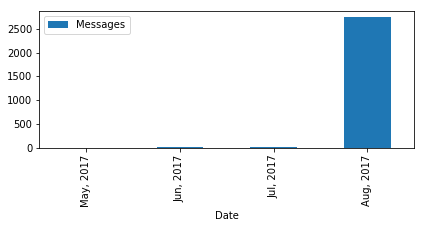

In [23]:
#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')



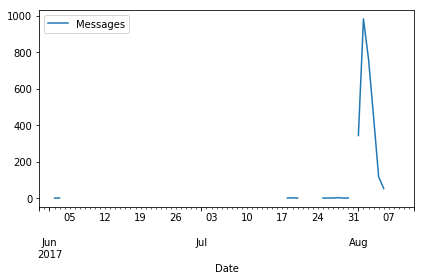

In [24]:
#Bar all
df = pd.DataFrame({'Date':timestamps})
df['count'] = 1

#Date time
df['Date'] = pd.to_datetime(df['Date'],unit='ms')

#Remove November Data for consistency:
df = df[(df['Date'].dt.year != 2017) | (df['Date'].dt.month != 11)]

#Reindex then delete
df.index = df['Date']
del df['Date']

df.columns = ["Messages"]
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesLine.png')

In [25]:
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

gb = df.groupby("user")["count"].agg({'count':sum})
#gb = df.groupby("user")["count"].sum()

#gb = gb.reset_index(drop=True)
#gb.columns = ["User","Count"]
#print gb
gb= gb.sort_values("count")
gb["ones"]=1
print gb
#gb.to_csv(ChannelName + "UserPosts.csv", sep='\t', encoding = 'utf-8')
gb.to_csv(ChannelName + "UserPosts.csv", sep='\t', encoding = 'utf-8')
#Great graph info: https://stackoverflow.com/a/29499109/4698963
#print gb.plot(kind='bar')

#TODO
#Group by 1000s
#How many users per 1000s count
#Number of messages vs. Number of users
#Not sure how to do this rn


                                count  ones
user                                       
deMoivre                            1     1
asdf                                1     1
Crow                                1     1
Ike35                               1     1
TheLichKing                         1     1
e-gf                                1     1
Karlanski Koth                      1     1
redneck workers party               1     1
MsNatSocialist                      1     1
Aleks "🥛" Khan                      1     1
BasedWhiteGoy                       1     1
Konrad                              2     1
Chris                               2     1
Ulfrik Nordmann                     2     1
14now                               2     1
Pena                                3     1
Victor Bravo                        3     1
centrist                            3     1
Oppai Knight                        3     1
handrubbingmerchant                 3     1
Alex00L                         

                      Date  count2
0  2017-08-12 13:06:33.843     127
1  2017-07-11 19:35:17.925       2
2  2017-08-06 18:00:31.995      59
3  2017-08-12 00:03:32.378       1
4  2017-08-12 17:37:21.816       6
5  2017-08-12 03:46:00.344       9
6  2017-08-12 16:45:32.981       1
7  2017-08-12 01:29:24.466      10
8  2017-07-18 23:51:18.905      44
9  2017-08-12 15:11:29.957      23
10 2017-07-19 23:46:42.090       2
11 2017-08-12 17:13:55.250      41
12 2017-08-12 01:31:35.805      11
13 2017-08-10 00:27:50.434       1
14 2017-07-04 19:16:44.134       7
15 2017-08-12 16:55:11.974       7
16 2017-08-12 19:39:57.678      18
17 2017-06-03 17:08:36.990      99
18 2017-07-27 16:44:04.586     190
19 2017-08-12 16:38:30.190     151
20 2017-08-12 15:11:40.169     103
21 2017-08-12 17:13:46.299       1
22 2017-08-08 07:14:06.439      98
23 2017-07-16 01:03:29.137      11
24 2017-08-08 07:57:34.529     392
25 2017-08-12 01:29:16.585      78
26 2017-08-12 16:38:11.003       1
27 2017-08-08 02:09:

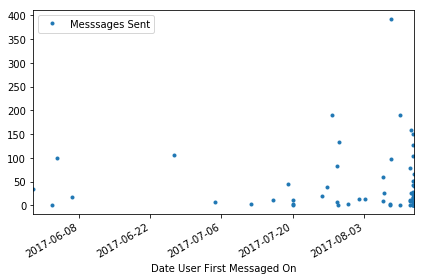

In [26]:
#Scattergraph
#Numer of posts over time
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
#gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
gb2 = gb2.reset_index(drop=True)
gb2['timestamps'] = df['date']
gb2['Date'] = pd.to_datetime(df['date'],unit='ms')
gb2["count2"] = gb2["count"]
del gb2['timestamps']
del gb2["count"]
print gb2

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
#bigdata.index = bigdata['Date']

#print gb2
gb2.columns = ["Date User First Messaged On","Messsages Sent"]
retweets = gb2.plot(x="Date User First Messaged On", y="Messsages Sent", style=".")
plt.tight_layout()
plt.savefig(ChannelName + 'MessagesSentScatter.png')
#my_scatter = pd.scatter_matrix(bigdata, diagonal="kde")

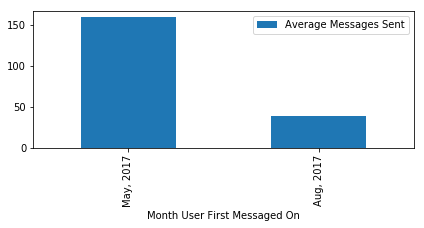

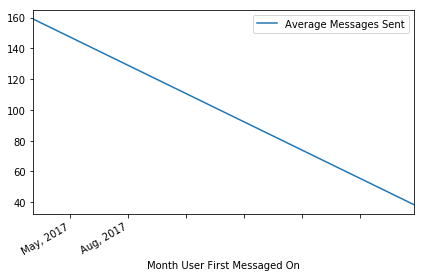

In [27]:
#Time referential graph vs average number of posts
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
bigdata = pd.concat([gb, gb2], axis=1)
bigdata = bigdata.reset_index(drop=True)
#print bigdata
#print bigdata

#Remove November Data for consistency:
bigdata = bigdata[(bigdata['Date'].dt.year != 2017) | (bigdata['Date'].dt.month != 11)]

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
bigdata.index = bigdata['Date']
gb3 = bigdata.groupby([(bigdata.index.year),(bigdata.index.month)]).mean().reset_index()
#print gb3

gb3.columns = ["Year", "Month", "Average Messages Sent"]
gb3['Month User First Messaged On'] = gb3[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb3['Month User First Messaged On'] = pd.to_datetime(gb3['Month User First Messaged On'])
del gb3['Year']
del gb3['Month']

#Bar
ax = gb3.set_index('Month User First Messaged On').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsBar.png')



#Line
ax = gb3.set_index('Month User First Messaged On').plot()
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeRefVsAveragePostsLine.png')

#Find time_referential = start date of posting

In [ ]:
#Average number of posts per user vs Time started
#Time

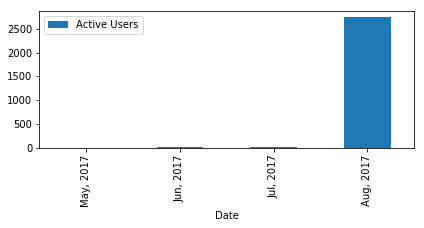

In [28]:
#Number of active users per month

#active user = user who posts at least once
df = pd.DataFrame({'date':timestamps, 'messages':message, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1
df.index = df['Date']
del df['date']

#Sort
df.sort_values(by='Date')
#print df
"""#Seperate dataframe into months so that you can remove duplicates later

#Group by month for number of active users
gb = df.groupby([(df.index.year),(df.index.month)])
print gb
"""

#List of dfs by month and year
dfList = []
for region, df_region in df.groupby([(df.index.year),(df.index.month)]):
    #print(len(df_region))
    dfList.append(df_region)
    
#Drop duplicates from timerange https://stackoverflow.com/questions/47341275/pandas-drop-duplicates-within-date-range
#Goal: Drop duplicates within each month
#Alt: drop duplicates for each subset dataframe
#Dropping duplicates so that all users within a month period is unique
#print "asdfasdf"
cleandfList =[]
for dataframe in dfList:
    #Use user_id since users can have the same name!!!
    dataframe = dataframe.drop_duplicates(subset="user_id")
    #print len(dataframe)
    cleandfList.append(dataframe)
    
#Combine dataframes
bigDF = pd.concat(cleandfList)
#print len(bigDF)
del bigDF['messages']
del bigDF['user']
del bigDF['user_id']
bigDF.index = bigDF['Date']
#print bigDF

#Count total of active users by months
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Active Users"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'ActiveUsers.png')


   Message Length       Date
0       90.000000 2017-05-01
1      171.750000 2017-06-01
2      204.400000 2017-07-01
3       73.889334 2017-08-01


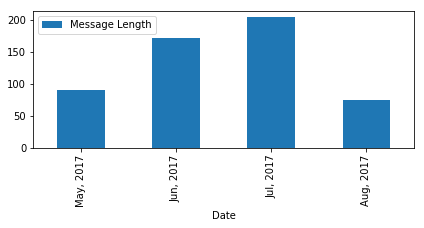

In [29]:
#Length of messages (aggregate average)

#TODO: NEED TO DO COHORT ANALYSIS

#Get messages + timestamps
df = pd.DataFrame({'date':timestamps, 'messages':message})
df['Date'] = pd.to_datetime(df['date'],unit='ms')

#Find length of each post
df['length'] = df['messages'].str.len()
#df['count'] = 1
del df["messages"]
del df["date"]
df.index = df['Date']
#print df

#Find Average + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).mean().reset_index()
gb.columns = ["Year", "Month", "Message Length"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'TimeAverageLength.png')

print gb

In [30]:
#Word Cloud
#idk what I'm doing. Gonna just do: https://github.com/amueller/word_cloud
import unicodedata

#Just get txt file I guess
with open(ChannelName + "ListofMessages.txt", "w") as output:
    for item in message:
        temp = unicodedata.normalize('NFKD', item).encode('ascii','ignore')
        """     
        stopwords = ['http','https','tweet','new','New','twitter','Twitter', 'Tweet']
        #querywords = temp.split()
        for word in stopwords:
            temp = temp.replace(word, '')
        """
        #print result
        #take out http, https, links etc.
        output.write(temp)

In [ ]:
#Check hate word frequency

#Use ntlk and hatelibrary
#http://www.nltk.org/book/ch01.html
#hatelibrary sign up for API: https://www.hatebase.org/login_register/registration_success
#a29261266be5f2798d7d08bac9bb70d6
#Daily Limit = 100 <=
#But I can always get a new key

#python wrapper : https://github.com/DanielJDufour/hatebase
messages

listofHatewords = []
frequency = []

#Total mentions of words in posts
#=>Treats each word in every post as equal<=

0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ethanc/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


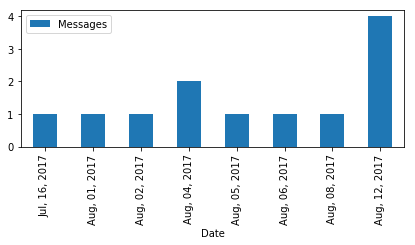

In [15]:
#Check how many mentions of "Unite the Right" or "Charlottesville"
containsWords = []
mentionFrequency = []

#print len(message)

for m in message:
    words = ["unite the right", "charlottesville"]
    lowercase = m.lower()
    containedWord = False
    count = 0
    for word in words:
        if word in lowercase:
            containedWord = True
            containsWords.append(1)
            #FIND HOW MANY MENTIONS PER MESSAGE
            count = count + lowercase.count(word)
    print count
    mentionFrequency.append(count)
            
    if not containedWord:
        containsWords.append(0)
        
"""print len(containsWords)
print len(message)

print containsWords"""


df = pd.DataFrame({'date':timestamps, 'mentionsCharlottesville':containsWords})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
gb = df[df.mentionsCharlottesville.isin([1])]
gb['Date'] = pd.to_datetime(gb['date'],unit='ms')
gb["mentions"] = gb["mentionsCharlottesville"]
del gb['date']
del gb["mentionsCharlottesville"]
gb.index = gb['Date']
del gb["Date"]

print gb
#print gb
#REmove all data without any mentions about discord

#print df
#Find Max + Reset Index (so that I can reassign column names)
gb = gb.groupby([(gb.index.year),(gb.index.month), (gb.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %d, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'RallyMentionsBarDay.png')

#Total mentions
print len(mentionFrequency)
print len(containsWords)




{u'data': {u'320404832823410690': {u'342115322356170753': {u'm': u'were not racists, were race realists',
    u't': 1501637049045,
    u'u': 63},
   u'342513662545756160': {u'm': u'we are not going HOLOCAUST right away',
    u't': 1501732020747,
    u'u': 2},
   u'342806555227324437': {u'm': u'There are some discords where you can',
    u't': 1501801851804,
    u'u': 8},
   u'342793549604978698': {u'm': u'The British white man who landed the probe on the comet had his victory ruined when the twitter outrage brigade said his t shirt was sexism.  They forced him to make a tearful apology rather than praising him for landing a probe on a comet.',
    u't': 1501798751022,
    u'u': 7},
   u'341982001114644480': {u'm': u'<@331165540347412481> what about "colonizing" non whites? Obviously without impregnating them',
    u't': 1501605262784,
    u'u': 8},
   u'342806279867203584': {u'm': u"No. Is that something I can grab from the server? I don't know my way around discord very well",
    u't